# U.S. Medical Insurance Costs

## Introduction

The aim of this project is to see if there's a relationship between the average U.S insurance cost and other variables such as `(age - status - health )`.
**The Dataset used in this project** is a CSV file **insuarnce.csv** which contains informations about several U.S citizens's insurance informations 



 ### importing libraries and helper functions

- importing libraries and loading the dataset
-Creating a helper function to edit any errors in the dataset easily . 

In [2]:
 # using pandas to read our file eaisly.
import pandas as pd

# importing seaborn to create creative visualizations 
import seaborn as sb
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

*building a helper function to help us edit any missing values or errors in our data*

In [3]:
# create a function to handle any errors in capitalization
def edit_naming(dataframe): 
    edited_columns = []
    for column in dataframe.columns:
        column = column.title()
        edited_columns.append(column)
        
    dataframe.columns = edited_columns
        
    return dataframe
        
# create a function to round any decimal values to be float64 .
def round_column(dataframe, column,digit):
    rounded_lst = []
    # round the decimals
    for num in dataframe[column]:
        if isinstance(digit,int) and digit >= 0:
            num = round(num,digit)
           
        elif digit == 'None':
            num = round(num)
            
        rounded_lst.append(num)
    
    dataframe[column] = rounded_lst
    
    return dataframe

# add a symbol to the desiered column
def add_symbol(symbol,dataframe,column): 
    dataframe[column] = symbol + dataframe[column].astype(str)
    
    return dataframe
        


## - Load the dataset and handle it using pandas -
Next step , navigating into the dataset looking for any errors or miss handleed infos such as (NA values)

In [4]:
# read the csv file 
df = pd.read_csv('insurance.csv')
df.head(20)
# create a data frame containing our dataset
df = pd.DataFrame(df)


After looking into our data set , we can notice some errors and bad naming methods , such as the columns names being in small letters , the charges columns supposed to hold informations about the insuarnce's cost thus, this column should be recognized as currency . We will fix that by adding the **$** symbol to elobrate on that . 

## clean and organize data 

First , we will fix the capitalization in all columns using our helper function that we created earlier


In [5]:
print(edit_naming(df))

# print our new modified columns :)
df

      Age     Sex     Bmi  Children Smoker     Region      Charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


,Age,Sex,Bmi,Children,Smoker,Region,Charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


 The columns now has a camel case names , much better :)

In [6]:
# using our helper function we will round charges column and add $ symbol to indicate whenever there's a currency
round_column(df,'Charges','None')
add_symbol('$',df,'Charges')

round_column(df,'Bmi',2)
# testing to see if any changes were made in the Charges column
df

,Age,Sex,Bmi,Children,Smoker,Region,Charges
0,19,female,27.90,0,yes,southwest,$16885
1,18,male,33.77,1,no,southeast,$1726
2,28,male,33.00,3,no,southeast,$4449
3,33,male,22.70,0,no,northwest,$21984
4,32,male,28.88,0,no,northwest,$3867
...,...,...,...,...,...,...,...
1333,50,male,30.97,3,no,northwest,$10601
1334,18,female,31.92,0,no,northeast,$2206
1335,18,female,36.85,0,no,southeast,$1630
1336,21,female,25.80,0,no,southwest,$2008


##  - Exploratiary Data Analysis -


 #### After cleaning and organizing our Data , we can start to make investigations and relate some relations in our dataset.

 - after cleaning the data , some of the queries we have come up with:
      - what is the relationship between age and cost ?
      - is there is any gender specific relationship ?
      - number of smokers and none smokers  
      
 `in order to answer the above questions , we will need to investigate the following :`
         - What is the average smokers in the data set ?
         - How much is the female:male ratio in regards of patients ? detect bias if there's any
         - What is the average cost in general ?


In [7]:
# start by exploring our data frame 
df.info()

#df.set_index()

df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Sex       1338 non-null   object 
 2   Bmi       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Charges   1338 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 73.3+ KB


,Age,Sex,Bmi,Children,Smoker,Region,Charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338
unique,NaN,2,NaN,NaN,2,4,1294
top,NaN,male,NaN,NaN,no,southeast,$11658
freq,NaN,676,NaN,NaN,1064,364,3
mean,39.207025,NaN,30.663468,1.094918,NaN,NaN,NaN
std,14.049960,NaN,6.098026,1.205493,NaN,NaN,NaN
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,NaN
25%,27.000000,NaN,26.297500,0.000000,NaN,NaN,NaN
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,NaN
75%,51.000000,NaN,34.692500,2.000000,NaN,NaN,NaN


In [8]:
# get average age
average_age = df['Age'].mean()
print(f'Average Age : {average_age}')

# number of females
females = df['Sex'].value_counts()['female']
print(f'according to our dataset ,we have {females} females patients.')

# num of males
males = df['Sex'].value_counts()['male']
print(f'according to our dataset ,we have {males} males patients.')    

# male : female ratio

male_female_ratio = males - females
print(f' Female:Male ratio: 0:{male_female_ratio}')

# num of females smoker vs num of male smokers
female_smoker = df[(df['Sex'] == 'female') & (df['Smoker'] == 'yes')]
male_smoker = df[(df['Sex'] == 'male') & (df['Smoker'] == 'yes')]

# non-smoker female 
nonsmoker_female = df[(df['Sex'] == 'female') & (df['Smoker'] == 'no')]
nonsmoker_male = df[(df['Sex'] == 'male') & (df['Smoker'] == 'no')]

# average cost of a medical insurance 
edit_cost = df['Charges'].str.replace('$','').astype(float)
average_cost = round(edit_cost).mean()

print(f'\nThe average cost of a medical insurance :{round(average_cost)}$')



Average Age : 39.20702541106129
according to our dataset ,we have 662 females patients.
according to our dataset ,we have 676 males patients.
 Female:Male ratio: 0:14

The average cost of a medical insurance :13270$


### Visualize results 

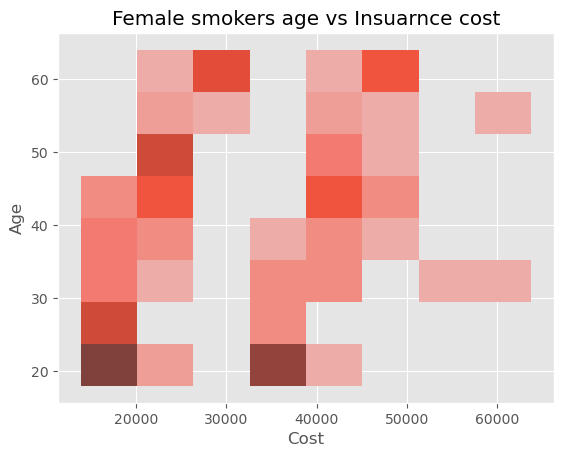

<Figure size 1000x1000 with 0 Axes>

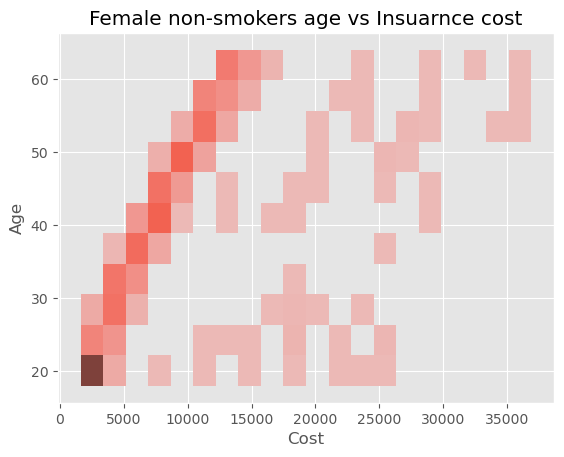

<Figure size 1000x1000 with 0 Axes>

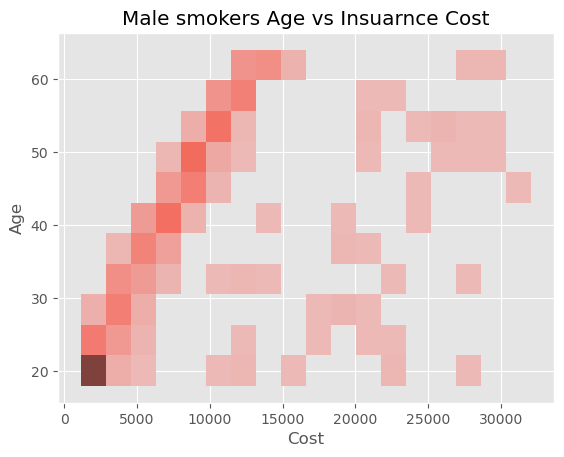

<Figure size 1000x1000 with 0 Axes>

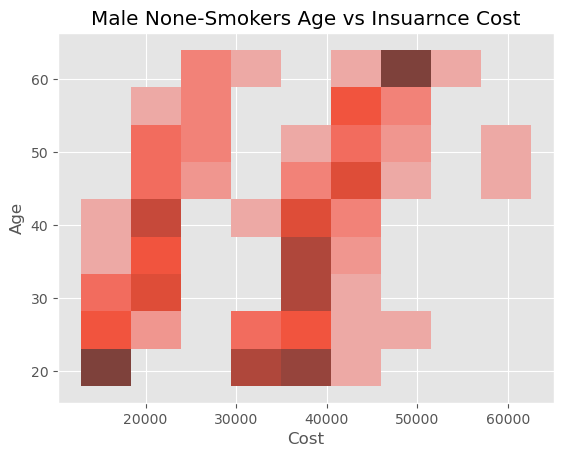

<Figure size 1000x1000 with 0 Axes>

,Max cost insurance female-nonsmoker-,Min cost insurance female-nonsmoker-,Max cost insurance female-smoekr-,Min cost insurance female-smoker-
Age,64.0,18.0,64.0,18.0
Charges,36911.0,1608.0,63770.0,13845.0


In [35]:

#female_smoker['Charges'] = female_smoker['Charges'].str.replace('$','').astype('float64')

#         ---------------------------------FEMALE --------------------------------
dfFemale_smoker = female_smoker
#dfFemale_smoker.drop(['Smoker', 'Sex'],axis=1, inplace=True)
#dfFemale_smoker.drop(['Bmi', 'Children', 'Region'], axis=1, inplace=True)


plt.title('Female smokers age vs Insuarnce cost')
sb.histplot(data=dfFemale_smoker, x='Charges', y='Age')
plt.xlabel('Cost')
plt.ylabel('Age')
plt.figure(figsize=(10, 10))
plt.show()

# plotting non-smokers to compare the results
dfFemale_nonsmoker = nonsmoker_female
#dfFemale_nonsmoker['Charges'] = dfFemale_nonsmoker['Charges'].str.replace('$','').astype('float64')
#dfFemale_nonsmoker.drop(['Bmi', 'Children', 'Region','Sex', 'Smoker'], axis=1, inplace=True)

plt.title('Female non-smokers age vs Insuarnce cost')
sb.histplot(data=dfFemale_nonsmoker, x='Charges', y='Age',legend='hi', kde=True)
plt.xlabel('Cost')
plt.ylabel('Age')
plt.figure(figsize=(10,10))

plt.show()

dfFemale_smoker.max(), dfFemale_nonsmoker.max()

#        ------------------------- MALES -------------------------------------------
#nonsmoker_male['Charges'] = nonsmoker_male['Charges'].str.replace('$','').astype('float64')
#male_smoker['Charges'] = male_smoker['Charges'].str.replace('$','').astype('float64')

#nonsmoker_male.drop(['Bmi', 'Sex', 'Children', 'Smoker','Region'],axis=1,inplace=True)

#male_smoker.drop(['Bmi', 'Sex', 'Children', 'Smoker','Region'], axis=1,inplace=True)

dfMale_smoker = nonsmoker_male
dfMale_nonsmoker = male_smoker

plt.title('Male smokers Age vs Insuarnce Cost')
sb.histplot(data=dfMale_smoker, x='Charges', y='Age')
plt.xlabel('Cost')
plt.ylabel('Age')
plt.figure(figsize=(10, 10))
plt.show()

plt.title('Male None-Smokers Age vs Insuarnce Cost')
sb.histplot(data=dfMale_nonsmoker, x='Charges', y='Age')
plt.xlabel('Cost')
plt.ylabel('Age')
plt.figure(figsize=(10, 10))
plt.show()

#print(f'Female maximum values (smoker and non-smoker):\n Smoker:\n{dfFemale_smoker.max()}\n non-smoker\n{dfFemale_nonsmoker.max()})')
#print('\n')
#print(f'Male maximum values (smoker and non-smoker)\n smoker : \n{dfMale_smoker.max()} \n\n non smoker: \n{dfMale_nonsmoker.max()} ')

#print(f'Female min smoker\n{dfFemale_smoker.min()} vs min non smoker female\n {dfFemale_nonsmoker.min()} ')

results_df = pd.DataFrame(data={
    'Max cost insurance female-nonsmoker-':dfFemale_nonsmoker.max(),
      'Min cost insurance female-nonsmoker-':dfFemale_nonsmoker.min(),
       'Max cost insurance female-smoekr-': dfFemale_smoker.max(),
         'Min cost insurance female-smoker-': dfFemale_smoker.min()})
results_df.head()

#### According to to the Dataset , Age , Gender , and healthstatus(Smoker, None-smoker) are some of the factors to determine the Cost per indivisual . 

- When comparing the Female smoker vs None smoker age vs Cost , the following was noticed :
    - The most expensive insurance costs `+3000 $`for a 64 years old None-smoker Female.
    - On the other hand , for a the smoker female we found that the top expensive insurance was around`+60000 $`
    
Thus its obvious that: 

    The older , the more expensive the insurance.   
    The American non smoker female has less costly insurance than the American female who smokes